# Analysis of YouTube Trends

### Content
+ Introduction: YouTube
+ Data description
+ Data preparation
+ Data analysis and visualization 
+ Conclusion

## 1. Introduction: YouTube

YouTube is an American online video-sharing platform headquartered in San Bruno, California. Three former PayPal employees—Chad Hurley, Steve Chen, and Jawed Karim—created the service in February 2005. Google bought the site in November 2006 for US$1.65 billion; YouTube now operates as one of Google's subsidiaries.

YouTube allows users to upload, view, rate, share, add to playlists, report, comment on videos, and subscribe to other users. It offers a wide variety of user-generated and corporate media videos. Available content includes video clips, TV show clips, music videos, short and documentary films, audio recordings, movie trailers, live streams, and other content such as video blogging, short original videos, and educational videos. Most content on YouTube is uploaded by individuals, but media corporations including CBS, the BBC, Vevo, and Hulu offer some of their material via YouTube as part of the YouTube partnership program. Unregistered users can only watch (but not upload) videos on the site, while registered users are also permitted to upload an unlimited number of videos and add comments to videos. Age-restricted videos are available only to registered users affirming themselves to be at least 18 years old.

Sourse (https://en.wikipedia.org/wiki/YouTube)

## 2. Data description

As it is written in title, the data consists of YouTube videos trends statistics. It is obvious that videos of such popular YouTubers as James Charles are going to be included in dataset. Analysis will be based on the dataset of YouTube Trends of August 2020, because it is the most recent data. 

Dataset contains statistics of different 11 countries. Dataset size is 2000. Variables that will be used in analysis:: 
+ title - title of the trending video
+ publishedAt - the time and date when the video was uploaded
+ channelTitle - title of the video's owner channel
+ trending_date - date when the video became trending
+ view_count - number of views of the video
+ likes - number of likes of the video
+ dislikes - number of dislikes of the video
+ comment_count - number of commemts under the video
+ categoryName - name of video's category

Country names are shortened:
+ BR - Brazil
+ CA - Canada
+ DE - Germany
+ FR - France
+ GB - Great Britain
+ IN - India
+ JP - Japan
+ KR - South Korea
+ MX - Mexico
+ RU - Russia
+ US - USA


For this project, there are 5 objectives:
1. Find what are the most common words in video titles.
2. Analyze the relationship between dislikes and comments.
3. Analyze how long does it take for a video to become trendy.
4. Find which channels have the greatest number of trendy videos.
5. Analyze the relationship in each country between categories and how trendy the video is.


## 3. Data preparation

For the start, let's collect each dataset in pandas form

In [1]:
#importing some modules that we will use
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#importing datasets 
br_yt = pd.read_csv('20.22.08_BR_videos.csv')
ca_yt = pd.read_csv('20.22.08_CA_videos.csv')
de_yt = pd.read_csv('20.22.08_DE_videos.csv')
fr_yt = pd.read_csv('20.22.08_FR_videos.csv')
gb_yt = pd.read_csv('20.22.08_GB_videos.csv')
in_yt = pd.read_csv('20.22.08_IN_videos.csv')
jp_yt = pd.read_csv('20.22.08_JP_videos.csv')
kr_yt = pd.read_csv('20.22.08_KR_videos.csv')
mx_yt = pd.read_csv('20.22.08_MX_videos.csv')
ru_yt = pd.read_csv('20.22.08_RU_videos.csv')
us_yt = pd.read_csv('20.22.08_US_videos.csv')
category_yt = pd.read_csv('category_id.csv')

In [3]:
br_yt.head(10)
#ca_yt.head(10)
#de_yt.head(10)
#fr_yt.head(10)
#gb_yt.head(10)
#in_yt.head(10)
#jp_yt.head(10)
#kr_yt.head(10)
#mx_yt.head(10)
#ru_yt.head(10)
#us_yt.head(10)
#category_yt.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,TiW3LUTZR5E,"Manu Gavassi, Gloria Groove - Deve ser horríve...",2020-08-21T14:00:11Z,UChH5-1INJHs2nt_irgpK0qw,ManuGavassiVEVO,10,20.22.08,Manu|Gavassi|Gloria|Groove|Deve|ser|horrível|d...,3193972,540284,16441,29792,https://i.ytimg.com/vi/TiW3LUTZR5E/default.jpg,False,False,Clique e ouça o single: https://umusicbrazil.l...
1,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,20.22.08,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,124756617,9846218,358410,4823577,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2,BqGvwzaVL9I,Luan e Whindersson Nunes - Paraíso (CLIPE OFIC...,2020-08-21T15:00:03Z,UCcGJGIBiDD2egQD43W95mJQ,LUAN,22,20.22.08,luan|whindersson nunes|luan otten|paraíso|um44...,1011593,155620,1040,7179,https://i.ytimg.com/vi/BqGvwzaVL9I/default.jpg,False,False,Se inscreva no canal e ative o sininho!Ouça PA...
3,5rvhDaVc6zg,ESTOU GRÁVIDA? FIZ O TESTE + Reação da minha i...,2020-08-21T14:18:32Z,UCikxOCCeSsn80hCOJlsD4lw,Bia Chagas,23,20.22.08,ESTOU GRÁVIDA|GRAVIDA|GRAVIDEZ|ESTOU GRAVIDA +...,307507,45696,2968,0,https://i.ytimg.com/vi/5rvhDaVc6zg/default.jpg,True,False,Mais um vídeo com muito amor para vocês ❤️Me a...
4,9UPGGgKoir8,"Bruno Martini, IZA, Timbaland - Bend The Knee",2020-08-21T14:00:10Z,UCftm0MlbYmqhK00o8NZEkDw,BrunoMartiniVEVO,10,20.22.08,Bruno|Martini|IZA|Timbaland|Bend|The|Knee|Univ...,277130,44056,303,4341,https://i.ytimg.com/vi/9UPGGgKoir8/default.jpg,False,False,Clique e ouça/ Click and listen: https://umusi...
5,gVVjp9ap1d4,"VOZ ATIVA 2020 - DEXTER (PART. DJONGA, CORUJA ...",2020-08-21T10:45:13Z,UCHg54zOmSnn-ToYlvK17l1A,Dexter Oitavo Anjo,10,20.22.08,dexter|dexter flor de lotus|dexter ao vivo” oi...,216241,42581,337,2493,https://i.ytimg.com/vi/gVVjp9ap1d4/default.jpg,False,False,Música lançada originalmente no EP Escolha o S...
6,wzodaNUkqg0,CLIPE TRAVA NA BELEZA / CLIPE OFICIAL / TIRULL...,2020-08-20T15:00:12Z,UCChX88lCd7o1buiqdWdME-Q,Tirullipa Show,23,20.22.08,Humor|Dvd|Tiririca|Tirullipa|Comedy Stand Up|S...,2003788,214256,3969,6641,https://i.ytimg.com/vi/wzodaNUkqg0/default.jpg,False,False,Clipe Oficial TRAVA NA BELEZAMúsica: TRAVA NA...
7,1Ji48IQkIxQ,Guilherme e Benuto - Pulei Na Piscina (DVD DRI...,2020-08-21T14:00:08Z,UCfG0o17SqRg8qAjlpTdxZag,Guilherme e Benuto,10,20.22.08,dvd drive in|guilherme e benuto|pulei na pisci...,949360,8801,97,367,https://i.ytimg.com/vi/1Ji48IQkIxQ/default.jpg,False,False,Ouça Nos Aplicativos de Música: https://SMB.ln...
8,zcr3xClaG_8,"Carol Biazin, Vitão - Sempre Que Der",2020-08-21T14:01:43Z,UCUyXM-KJtii9lNE21UNWUWQ,CarolBiazinVEVO,10,20.22.08,Carol|Biazin|Vitão|Sempre|Que|Der|Universal|Mu...,214194,31392,734,2959,https://i.ytimg.com/vi/zcr3xClaG_8/default.jpg,False,False,Clique aqui e ouça a música: https://umusicbra...
9,ZPBjnSmr7lg,LIGUEI PARA MINHA EX NAMORADA NESSE VÍDEO!! ( ...,2020-08-20T23:00:04Z,UCbTVTephX30ZhQF5zwFppBg,rezendeevil,24,20.22.08,Rezende|Rezende evil|Rezendeevil|evil|entreten...,2002515,504835,5857,15433,https://i.ytimg.com/vi/ZPBjnSmr7lg/default.jpg,False,False,SE INSCREVA: https://www.youtube.com/user/reze...


Now we have dataframes of the dataset. 

Let's drop columns that we do not need!

In [4]:
del kr_yt['thumbnail_link'] 
del kr_yt['ratings_disabled'] 
del kr_yt['description'] 
del kr_yt['video_id'] 
del kr_yt['channelId'] 
del kr_yt['tags'] 
del kr_yt['comments_disabled'] 
kr_yt.head(10)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
0,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,20.22.08,124756617,9846105,358395,4823566
1,Dynamite,2020-08-21T04:18:03Z,BTS - Topic,10,20.22.08,3517743,620303,2355,15348
2,"나 적응 다 됐어요~ 일타강사 국진쌤 명품샷의 향연, 근데 어째 퍼팅이..?ㅋㅋㅋ ...",2020-08-21T09:00:01Z,김구라의 뻐꾸기 골프 TV,17,20.22.08,576994,6529,471,922
3,한국이 극소수 국가만 보유한 확산탄을 보유하자 전 세계 94개국이 포기하라며 한국에...,2020-08-22T08:30:00Z,꺼리튜브,28,20.22.08,274375,7992,207,403
4,3D펜으로 나고 만들기,2020-08-21T03:10:45Z,사나고 Sanago,26,20.22.08,1500071,55535,563,10266
5,고개 숙여 사과드립니다. 그리고 해명하고 싶습니다.,2020-08-22T05:00:04Z,오프라이드oh-pride,2,20.22.08,203402,1969,6186,3008
6,사랑해♥[EP.16],2020-08-22T08:14:22Z,사과몽,20,20.22.08,244897,6496,76,2608
7,인내심 상위 0.01%만 끝까지 볼 수 있다는 전설의 영화,2020-08-22T04:00:19Z,지무비 : G Movie,1,20.22.08,582822,11500,240,2559
8,"[주진우 라이브 스페셜] 주진우, 전광훈 15년 넘게 취재했다! (200822)",2020-08-22T08:00:14Z,KBS 1라디오,25,20.22.08,112578,9129,173,539
9,짧은 시간이었지만 감사했습니다. | 연고티비,2020-08-22T04:15:00Z,연고티비,27,20.22.08,410415,11613,245,2560


We dropped columns of korean trending videos dataframe. Let's do the same with others.

In [5]:
del br_yt['thumbnail_link'] 
del br_yt['ratings_disabled'] 
del br_yt['description'] 
del br_yt['video_id'] 
del br_yt['channelId'] 
del br_yt['tags'] 
del br_yt['comments_disabled']
br_yt.head(10)

del ca_yt['thumbnail_link'] 
del ca_yt['ratings_disabled'] 
del ca_yt['description'] 
del ca_yt['video_id'] 
del ca_yt['channelId'] 
del ca_yt['tags'] 
del ca_yt['comments_disabled']
#ca_yt.head(10)

del de_yt['thumbnail_link'] 
del de_yt['ratings_disabled'] 
del de_yt['description'] 
del de_yt['video_id'] 
del de_yt['channelId'] 
del de_yt['tags'] 
del de_yt['comments_disabled']
#de_yt.head(10)

del fr_yt['thumbnail_link'] 
del fr_yt['ratings_disabled'] 
del fr_yt['description'] 
del fr_yt['video_id'] 
del fr_yt['channelId'] 
del fr_yt['tags'] 
del fr_yt['comments_disabled']
#fr_yt.head(10)

del gb_yt['thumbnail_link'] 
del gb_yt['ratings_disabled'] 
del gb_yt['description'] 
del gb_yt['video_id'] 
del gb_yt['channelId'] 
del gb_yt['tags'] 
del gb_yt['comments_disabled']
#gb_yt.head(10)

del in_yt['thumbnail_link'] 
del in_yt['ratings_disabled'] 
del in_yt['description'] 
del in_yt['video_id'] 
del in_yt['channelId'] 
del in_yt['tags'] 
del in_yt['comments_disabled']
#in_yt.head(10)

del jp_yt['thumbnail_link'] 
del jp_yt['ratings_disabled'] 
del jp_yt['description']
del jp_yt['video_id'] 
del jp_yt['channelId'] 
del jp_yt['tags'] 
del jp_yt['comments_disabled']
#jp_yt.head(10)

del mx_yt['thumbnail_link'] 
del mx_yt['ratings_disabled'] 
del mx_yt['description']
del mx_yt['video_id'] 
del mx_yt['channelId'] 
del mx_yt['tags'] 
del mx_yt['comments_disabled']
#mx_yt.head(10)

del ru_yt['thumbnail_link'] 
del ru_yt['ratings_disabled'] 
del ru_yt['description']
del ru_yt['video_id'] 
del ru_yt['channelId'] 
del ru_yt['tags'] 
del ru_yt['comments_disabled']
#ru_yt.head(10)

del us_yt['thumbnail_link'] 
del us_yt['ratings_disabled'] 
del us_yt['description'] 
del us_yt['video_id'] 
del us_yt['channelId'] 
del us_yt['tags'] 
del us_yt['comments_disabled']
#us_yt.head(10)

We have dropped needless columns with a success! 
Let's check dataframes for:
+ Null values
+ Dublicated values

In [6]:
#checking for null values

br_yt.info()
#ca_yt.info()
#de_yt.info()
#fr_yt.info()
#gb_yt.info()
#in_yt.info()
#jp_yt.info()
#kr_yt.info()
#mx_yt.info()
#ru_yt.info()
#us_yt.info()
#category_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          200 non-null    object
 1   publishedAt    200 non-null    object
 2   channelTitle   200 non-null    object
 3   categoryId     200 non-null    int64 
 4   trending_date  200 non-null    object
 5   view_count     200 non-null    int64 
 6   likes          200 non-null    int64 
 7   dislikes       200 non-null    int64 
 8   comment_count  200 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


We have checked each column of each df and have not found any null values.

Time to check them for dublicates.

In [7]:
#checking for dublicates

br_yt.duplicated()
#ca_yt.duplicated()
#de_yt.duplicated()
#fr_yt.duplicated()
#gb_yt.duplicated()
#in_yt.duplicated()
#jp_yt.duplicated()
#kr_yt.duplicated()
#mx_yt.duplicated()
#ru_yt.duplicated()
#us_yt.duplicated()
#category_yt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

There is no dublicated data!

In the project we need both trend videos info and categories(names of categories), so let's merge dataframes

In [8]:
#in categories df we have not really useful names of columns. Let me change them.
category_yt.rename(columns = {'2':'categoryId', 'Autos & Vehicles':'categoryName'}, 
                   inplace = True) 

In [9]:
#let's merge videos df with categories
br_yt5 = pd.merge(br_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')

In [10]:
br_yt5.head(10)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,categoryName
0,"Manu Gavassi, Gloria Groove - Deve ser horríve...",2020-08-21T14:00:11Z,ManuGavassiVEVO,10,20.22.08,3193972,540284,16441,29792,Music
1,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,20.22.08,124756617,9846218,358410,4823577,Music
2,Luan e Whindersson Nunes - Paraíso (CLIPE OFIC...,2020-08-21T15:00:03Z,LUAN,22,20.22.08,1011593,155620,1040,7179,People & Blogs
3,ESTOU GRÁVIDA? FIZ O TESTE + Reação da minha i...,2020-08-21T14:18:32Z,Bia Chagas,23,20.22.08,307507,45696,2968,0,Comedy
4,"Bruno Martini, IZA, Timbaland - Bend The Knee",2020-08-21T14:00:10Z,BrunoMartiniVEVO,10,20.22.08,277130,44056,303,4341,Music
5,"VOZ ATIVA 2020 - DEXTER (PART. DJONGA, CORUJA ...",2020-08-21T10:45:13Z,Dexter Oitavo Anjo,10,20.22.08,216241,42581,337,2493,Music
6,CLIPE TRAVA NA BELEZA / CLIPE OFICIAL / TIRULL...,2020-08-20T15:00:12Z,Tirullipa Show,23,20.22.08,2003788,214256,3969,6641,Comedy
7,Guilherme e Benuto - Pulei Na Piscina (DVD DRI...,2020-08-21T14:00:08Z,Guilherme e Benuto,10,20.22.08,949360,8801,97,367,Music
8,"Carol Biazin, Vitão - Sempre Que Der",2020-08-21T14:01:43Z,CarolBiazinVEVO,10,20.22.08,214194,31392,734,2959,Music
9,LIGUEI PARA MINHA EX NAMORADA NESSE VÍDEO!! ( ...,2020-08-20T23:00:04Z,rezendeevil,24,20.22.08,2002515,504835,5857,15433,Entertainment


Merging with brazilian trend videos was done successfully. Let's do the same with other dataframes.

In [11]:
#merging
ca_yt5 = pd.merge(ca_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')

de_yt5 = pd.merge(de_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')

fr_yt5 = pd.merge(fr_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
gb_yt5 = pd.merge(gb_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
in_yt5 = pd.merge(in_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
jp_yt5 = pd.merge(jp_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
kr_yt5 = pd.merge(kr_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
mx_yt5 = pd.merge(mx_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
ru_yt5 = pd.merge(ru_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')
us_yt5 = pd.merge(us_yt,
                 category_yt[['categoryId', 'categoryName']],
                 on='categoryId', 
                 how='left')

We have done joining dataframes for data visualization! Now let me delete dolumn 'categoryId', because it became useless.

In [12]:
#deleting 
del br_yt5['categoryId']
br_yt5.head(10)

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count,categoryName
0,"Manu Gavassi, Gloria Groove - Deve ser horríve...",2020-08-21T14:00:11Z,ManuGavassiVEVO,20.22.08,3193972,540284,16441,29792,Music
1,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,20.22.08,124756617,9846218,358410,4823577,Music
2,Luan e Whindersson Nunes - Paraíso (CLIPE OFIC...,2020-08-21T15:00:03Z,LUAN,20.22.08,1011593,155620,1040,7179,People & Blogs
3,ESTOU GRÁVIDA? FIZ O TESTE + Reação da minha i...,2020-08-21T14:18:32Z,Bia Chagas,20.22.08,307507,45696,2968,0,Comedy
4,"Bruno Martini, IZA, Timbaland - Bend The Knee",2020-08-21T14:00:10Z,BrunoMartiniVEVO,20.22.08,277130,44056,303,4341,Music
5,"VOZ ATIVA 2020 - DEXTER (PART. DJONGA, CORUJA ...",2020-08-21T10:45:13Z,Dexter Oitavo Anjo,20.22.08,216241,42581,337,2493,Music
6,CLIPE TRAVA NA BELEZA / CLIPE OFICIAL / TIRULL...,2020-08-20T15:00:12Z,Tirullipa Show,20.22.08,2003788,214256,3969,6641,Comedy
7,Guilherme e Benuto - Pulei Na Piscina (DVD DRI...,2020-08-21T14:00:08Z,Guilherme e Benuto,20.22.08,949360,8801,97,367,Music
8,"Carol Biazin, Vitão - Sempre Que Der",2020-08-21T14:01:43Z,CarolBiazinVEVO,20.22.08,214194,31392,734,2959,Music
9,LIGUEI PARA MINHA EX NAMORADA NESSE VÍDEO!! ( ...,2020-08-20T23:00:04Z,rezendeevil,20.22.08,2002515,504835,5857,15433,Entertainment


In [13]:
#continue deleting 
del ca_yt5['categoryId']
#ca_yt5.head(10)
 
del de_yt5['categoryId']
#de_yt5.head(10)

del fr_yt5['categoryId']
#fr_yt5.head(10)

del gb_yt5['categoryId']
#gb_yt5.head(10)

del in_yt5['categoryId']
#in_yt5.head(10)

del jp_yt5['categoryId']
#jp_yt5.head(10)

del kr_yt5['categoryId']
#kr_yt5.head(10)

del mx_yt5['categoryId']
#mx_yt5.head(10)

del ru_yt5['categoryId']
#ru_yt5.head(10)

del us_yt5['categoryId']
#us_yt5.head(10)

In [14]:
ca_yt5.head(10)

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count,categoryName
0,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,20.22.08,124756617,9846070,358386,4823512,Music
1,Giving JoJo Siwa A FULL MAKEOVER!,2020-08-21T19:00:06Z,James Charles,20.22.08,7628571,670827,14922,60422,Entertainment
2,We Can't Hide This Anymore!,2020-08-20T18:49:37Z,Roman Atwood Vlogs,20.22.08,3323513,315842,3324,56408,People & Blogs
3,Goat Vs. Moose (FULL VIDEO) | Sunny Malton | B...,2020-08-21T03:03:19Z,Brown Boys Records,20.22.08,228250,21176,22421,8804,Music
4,Know Your History | Official Call of Duty®: B...,2020-08-21T16:00:06Z,Call of Duty,20.22.08,767729,63189,1218,6663,Gaming
5,"BTS talks Dynamite, life in quarantine & the f...",2020-08-21T17:15:09Z,Zach Sang Show,20.22.08,423989,76525,190,4119,Entertainment
6,Sidhu Moose Wala - My Block | Official Video |...,2020-08-20T03:30:03Z,SagaHits,20.22.08,10568521,594794,52754,360942,Music
7,"Israel Adesanya, Paulo Costa get HEATED in int...",2020-08-21T05:15:23Z,ESPN MMA,20.22.08,958410,22615,661,10276,Sports
8,Top5 - Steppaz ft 3MFrench & 6ixbuzz (Official...,2020-08-21T02:16:47Z,Top5,20.22.08,104593,3842,288,456,Music
9,Migos - Need It (Official Video) ft. YoungBoy ...,2020-08-20T19:00:09Z,MigosVEVO,20.22.08,5864757,370241,6382,23512,Music


For some tasks there is a need to group data by countries. So, let me create new column named 'country' with names of countries.

In [15]:
br_yt5['country']='Brazil'
br_yt5

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count,categoryName,country
0,"Manu Gavassi, Gloria Groove - Deve ser horríve...",2020-08-21T14:00:11Z,ManuGavassiVEVO,20.22.08,3193972,540284,16441,29792,Music,Brazil
1,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,20.22.08,124756617,9846218,358410,4823577,Music,Brazil
2,Luan e Whindersson Nunes - Paraíso (CLIPE OFIC...,2020-08-21T15:00:03Z,LUAN,20.22.08,1011593,155620,1040,7179,People & Blogs,Brazil
3,ESTOU GRÁVIDA? FIZ O TESTE + Reação da minha i...,2020-08-21T14:18:32Z,Bia Chagas,20.22.08,307507,45696,2968,0,Comedy,Brazil
4,"Bruno Martini, IZA, Timbaland - Bend The Knee",2020-08-21T14:00:10Z,BrunoMartiniVEVO,20.22.08,277130,44056,303,4341,Music,Brazil
...,...,...,...,...,...,...,...,...,...,...
195,Live da Casa dos Caipiras,2020-08-16T22:58:35Z,Teodoro Sampaio,20.22.08,94418,1795,38,11,Entertainment,Brazil
196,MAYA NASCEU | Amanda Domenico,2020-08-15T17:17:28Z,Amanda Domenico,20.22.08,1186268,136189,1269,2895,Howto & Style,Brazil
197,A BOLA DE CURVAS IMPRESSIONANTES 🥵😱,2020-08-16T21:06:03Z,Reversão,20.22.08,651933,109533,374,728,Sports,Brazil
198,OS BARÕES DA PISADINHA - O Piseiro Estourou (A...,2020-08-15T21:00:10Z,Filtr Brasil,20.22.08,263278,1848,206,72,Music,Brazil


Adding new column was successful. Now let's do the same with other dataframes.

In [16]:
ca_yt5['country']='Canada'
#ca_yt5.head(10)
 
de_yt5['country']='Germany'
#de_yt5.head(10)

fr_yt5['country']='France'
#fr_yt5.head(10)

gb_yt5['country']='Great Britain'
#gb_yt5.head(10)

in_yt5['country']='India'
#in_yt5.head(10)

jp_yt5['country']='Japan'
#jp_yt5.head(10)

kr_yt5['country']='South Korea'
#kr_yt5.head(10)

mx_yt5['country']='Mexico'
#mx_yt5.head(10)

ru_yt5['country']='Russia'
#ru_yt5.head(10)

us_yt5['country']='USA'
#us_yt5.head(10)

Now dataframes for each country are ready, but what about collecting all data into the one dataframe?

In [17]:
#let's join them by using concat function
all_yt = pd.concat([br_yt5, ca_yt5, de_yt5, fr_yt5, gb_yt5, in_yt5, jp_yt5, kr_yt5, mx_yt5, ru_yt5, us_yt5], ignore_index=True)

In [18]:
all_yt.head(10)

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count,categoryName,country
0,"Manu Gavassi, Gloria Groove - Deve ser horríve...",2020-08-21T14:00:11Z,ManuGavassiVEVO,20.22.08,3193972,540284,16441,29792,Music,Brazil
1,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,20.22.08,124756617,9846218,358410,4823577,Music,Brazil
2,Luan e Whindersson Nunes - Paraíso (CLIPE OFIC...,2020-08-21T15:00:03Z,LUAN,20.22.08,1011593,155620,1040,7179,People & Blogs,Brazil
3,ESTOU GRÁVIDA? FIZ O TESTE + Reação da minha i...,2020-08-21T14:18:32Z,Bia Chagas,20.22.08,307507,45696,2968,0,Comedy,Brazil
4,"Bruno Martini, IZA, Timbaland - Bend The Knee",2020-08-21T14:00:10Z,BrunoMartiniVEVO,20.22.08,277130,44056,303,4341,Music,Brazil
5,"VOZ ATIVA 2020 - DEXTER (PART. DJONGA, CORUJA ...",2020-08-21T10:45:13Z,Dexter Oitavo Anjo,20.22.08,216241,42581,337,2493,Music,Brazil
6,CLIPE TRAVA NA BELEZA / CLIPE OFICIAL / TIRULL...,2020-08-20T15:00:12Z,Tirullipa Show,20.22.08,2003788,214256,3969,6641,Comedy,Brazil
7,Guilherme e Benuto - Pulei Na Piscina (DVD DRI...,2020-08-21T14:00:08Z,Guilherme e Benuto,20.22.08,949360,8801,97,367,Music,Brazil
8,"Carol Biazin, Vitão - Sempre Que Der",2020-08-21T14:01:43Z,CarolBiazinVEVO,20.22.08,214194,31392,734,2959,Music,Brazil
9,LIGUEI PARA MINHA EX NAMORADA NESSE VÍDEO!! ( ...,2020-08-20T23:00:04Z,rezendeevil,20.22.08,2002515,504835,5857,15433,Entertainment,Brazil


In [19]:
all_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2144 non-null   object
 1   publishedAt    2144 non-null   object
 2   channelTitle   2144 non-null   object
 3   trending_date  2144 non-null   object
 4   view_count     2144 non-null   int64 
 5   likes          2144 non-null   int64 
 6   dislikes       2144 non-null   int64 
 7   comment_count  2144 non-null   int64 
 8   categoryName   2076 non-null   object
 9   country        2144 non-null   object
dtypes: int64(4), object(6)
memory usage: 167.6+ KB


We have some null values. Let's drop them.

In [20]:
all_yt = all_yt.dropna()

In [21]:
all_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2076 non-null   object
 1   publishedAt    2076 non-null   object
 2   channelTitle   2076 non-null   object
 3   trending_date  2076 non-null   object
 4   view_count     2076 non-null   int64 
 5   likes          2076 non-null   int64 
 6   dislikes       2076 non-null   int64 
 7   comment_count  2076 non-null   int64 
 8   categoryName   2076 non-null   object
 9   country        2076 non-null   object
dtypes: int64(4), object(6)
memory usage: 178.4+ KB


In [22]:
#check for dublicates

#all_yt.duplicated().count()
len(all_yt)-len(all_yt.drop_duplicates())

0

We can see that after joining all dataframes we have 223 dublicated rows. In my point of view, dropping them would be great.

In [23]:
all_yt = all_yt.drop_duplicates()

In [24]:
#check again for null values and dublicates

#len(all_yt)-len(all_yt.drop_duplicates())
all_yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2076 non-null   object
 1   publishedAt    2076 non-null   object
 2   channelTitle   2076 non-null   object
 3   trending_date  2076 non-null   object
 4   view_count     2076 non-null   int64 
 5   likes          2076 non-null   int64 
 6   dislikes       2076 non-null   int64 
 7   comment_count  2076 non-null   int64 
 8   categoryName   2076 non-null   object
 9   country        2076 non-null   object
dtypes: int64(4), object(6)
memory usage: 178.4+ KB


Data Preparation part is over. We have done:
+ dropping needless colums 
+ adding new column
+ merging and joining dataframes
+ checking and deleting null values, dublicated data

Dataframes for Data Analysis and Visualization are ready

## 4. Data Analysis and Visualisation (4th and 5th questions are finished)

### 4.1 Q1: Find what are the most common words in video titles.

Have you ever thought which words are used more than others? To find an answer for this question, let me analyze video titles of YouTube trends. 

In [25]:
#let me show top-20 most used words

#splitting words in rows
titles = list(all_yt["title"].apply(lambda x: x.split()))
titles = [x for y in titles for x in y]

#showing top by using most_common() function
#that function returns a list with the count of words
Counter(titles).most_common(20)

[('|', 752),
 ('-', 583),
 ('2020', 131),
 ('(Official', 107),
 ('Video)', 105),
 ('Official', 90),
 ('The', 89),
 ('the', 86),
 ('&', 81),
 ('de', 78),
 ('/', 75),
 ('A', 73),
 ('DE', 66),
 ('to', 63),
 ('a', 58),
 ('Music', 56),
 ('MV', 51),
 ('of', 49),
 ('BTS', 45),
 ('on', 44)]

As you can see, '|', '-', '/' and others are pretty popular symbols. However, we will not count them as words.

In [26]:
#let's get rid of them

### 4.2 Q2: Analyze the relationship between dislikes and comments.

Each video has likes, dislikes and comments. For me, it it pretty interesting if there is any link between trend and the amount of dislikes. So, I want to see the distribution of the number of dislikes for video trends.

Text(0.5, 1.0, 'Dislikes distribution with hist')

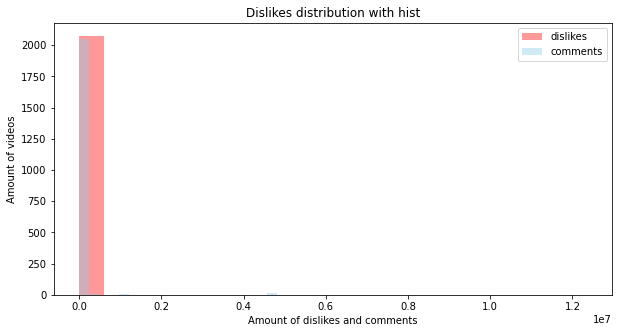

In [27]:
plt.figure(figsize = (10,5))
sns.distplot(all_yt["dislikes"], kde=False, color='red', label='dislikes', bins=20)
sns.distplot(all_yt["comment_count"], kde=False, color='skyblue',label='comments', bins=20)
plt.legend()
plt.xlabel("Amount of dislikes and comments")
plt.ylabel("Amount of videos")
plt.title("Dislikes distribution with hist")


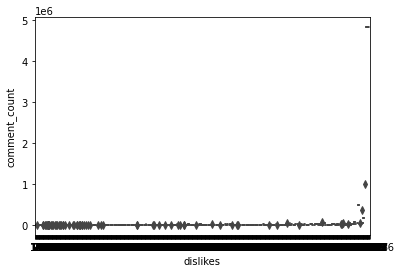

In [28]:
sns.boxplot( x=all_yt["dislikes"], y=all_yt["comment_count"] )

### 4.3 Q3: Analyze how long does it take for a video to become trendy.

### 4.4 Q4: Find which channels have the greatest number of trending video

Each video has one and only one owner, but that owner may have many videos, some of which can ne trending too.

It is pretty interesting to check which channels are the best content creators for August 2020. It is believed that k-pop content is really popular nowadays. What about checking it?
Let's try to analize it and create top-20 YouTube channels by using  seaborn barplot:

[Text(0.5, 1.0, 'Which channels have the greatest number of trendy video')]

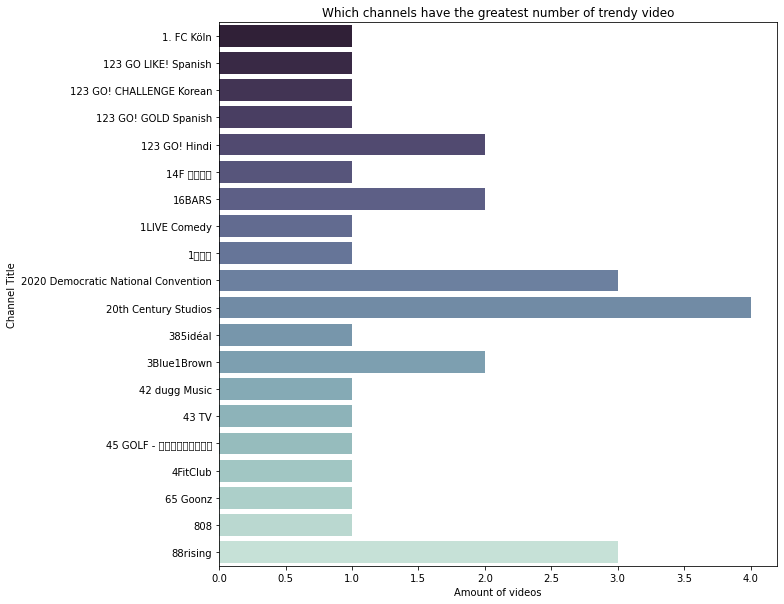

In [72]:
#sizing figure
fig, ax = plt.subplots(figsize=(10,10))

#grouping videos by channels and counting them
group_vid41 = all_yt.groupby("channelTitle").size().reset_index(name="video_num").head(20)

#plotting a bar chart with beautiful palette
sns.barplot(x="video_num", y="channelTitle", data=group_vid41,
            palette=sns.cubehelix_palette(start=.5, rot=-.5, n_colors=20, reverse=True))

#setting some labels and title 
ax.set(xlabel ="Amount of videos")
ax.set(ylabel="Channel Title")
ax.set(title="Which channels have the greatest number of trendy video")

As you can see, we have done plotting, but there we have only first 25 channels placed in aphabetical order and the number of their videos.

To find which channels have the greatest number of trendy video, there is a need to put channels in descending order by the number of videos.

[Text(0.5, 1.0, 'Which channels have the greatest number of trendy video')]

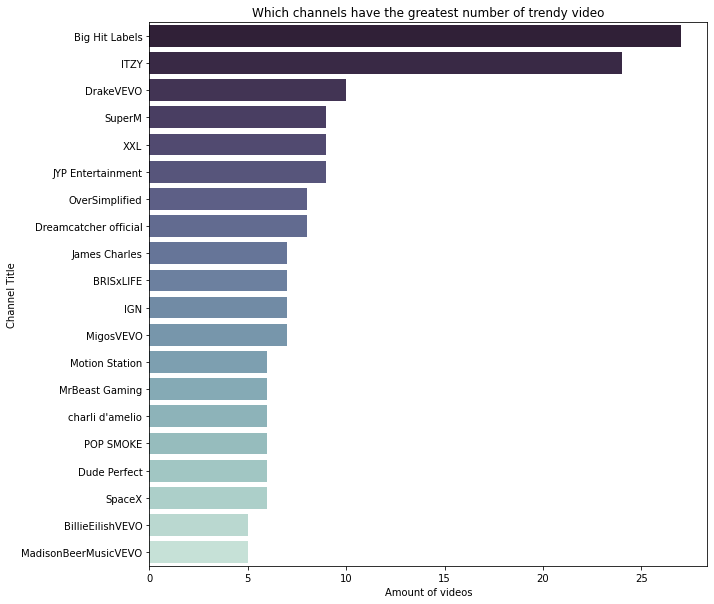

In [76]:
fig, ax = plt.subplots(figsize=(10,10))

group_vid42 = all_yt.groupby("channelTitle").size().reset_index(name="video_num") 
#sorting by counted number of videos for each channel
sorted_count=group_vid42.sort_values("video_num", ascending=False).head(20)

sns.barplot(x="video_num", y="channelTitle", data=sorted_count,
            palette=sns.cubehelix_palette(start=.5, rot=-.5, n_colors=20, reverse=True))

ax.set(xlabel ="Amount of videos")
ax.set(ylabel="Channel Title")
ax.set(title="Which channels have the greatest number of trendy video")

By the above barplot, we can see that 'Big Hit Labels' is the channel with the biggest number of trending videos - 27 videos. It is korean channel with music content that was created in 2008. The second channel with most trendy videos is 'ITZY' with 24 videos. That channel has korean music content too! Surprisingly, 4th(SuperM), 6th(JYP Entertainment) and 8th channels(Dreamcatcher official) are based on k-pop music.

According to the outcomes, we can say that k-pop content became popular these days.

Talking about other channels, we must point out that there is a huge difference between amount of 1st, 2nd channels' videos and others'.

### 4.5 Q5:Analyze the relationship in each country between categories and how trendy the video is.

YouTube groups videos by categories. For example, the winner by the amount of trending videos, 'Big Hit Labels', has 'Music' category for its trending videos. In previous analysis most of top content creators' videos are in 'Music' category. 

Would music category have the biggest number of trendings? Which category is going to be the winner among 14 different categories? Which are going to be local and world winners?

[Text(0.5, 1.0, 'Which categories have the greatest number of trendy video')]

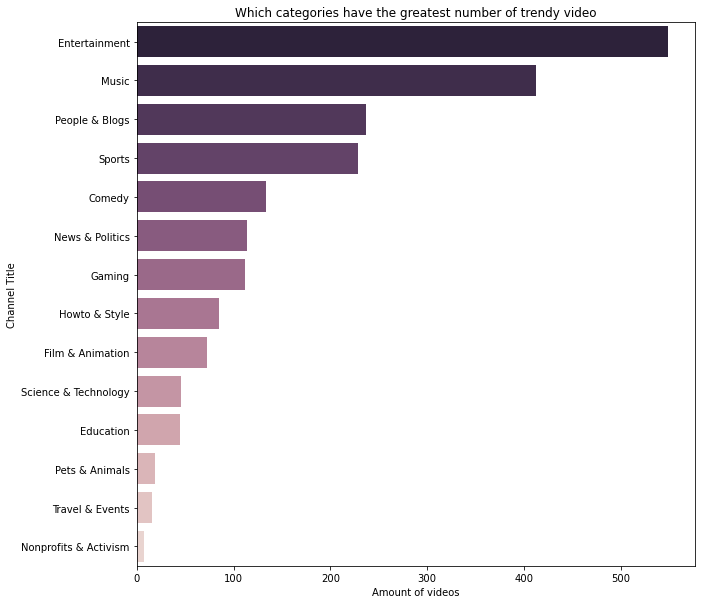

In [84]:
#for the start, let's see which category has the highest number of trending videos all over the world
fig, ax = plt.subplots(figsize=(10,10))

group_vid = all_yt.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count=group_vid.sort_values("video_num", ascending=False).head(14)

#I think it'd better to keep horizontal
sns.barplot(x="video_num", y="categoryName", data=sorted_count,
            palette=sns.cubehelix_palette(n_colors=14, reverse=True))

ax.set(xlabel ="Amount of videos")
ax.set(ylabel="Channel Title")
ax.set(title="Which categories have the greatest number of trendy video")

Let me do the same but with all 11 countries.

In [117]:
#variables
#I decided that it'd be better for readability to do top-10 instead of ranking all 14 cateories.
group_vid51 = all_yt.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count51=group_vid51.sort_values("video_num", ascending=False).head(10)

group_vid52 = br_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count52=group_vid52.sort_values("video_num", ascending=False).head(10)

group_vid53 = ca_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count53=group_vid53.sort_values("video_num", ascending=False).head(10)

group_vid54 = de_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count54=group_vid54.sort_values("video_num", ascending=False).head(10)

group_vid55 = fr_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count55=group_vid55.sort_values("video_num", ascending=False).head(10)

group_vid56 = gb_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count56=group_vid56.sort_values("video_num", ascending=False).head(10)

group_vid57 = in_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count57=group_vid57.sort_values("video_num", ascending=False).head(10)

group_vid58 = jp_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count58=group_vid58.sort_values("video_num", ascending=False).head(10)

group_vid59 = kr_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count59=group_vid59.sort_values("video_num", ascending=False).head(10)

group_vid510 = mx_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count510=group_vid510.sort_values("video_num", ascending=False).head(10)

group_vid511 = ru_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count511=group_vid511.sort_values("video_num", ascending=False).head(10)

group_vid512 = us_yt5.groupby("categoryName").size().reset_index(name="video_num") 
sorted_count512=group_vid512.sort_values("video_num", ascending=False).head(10)

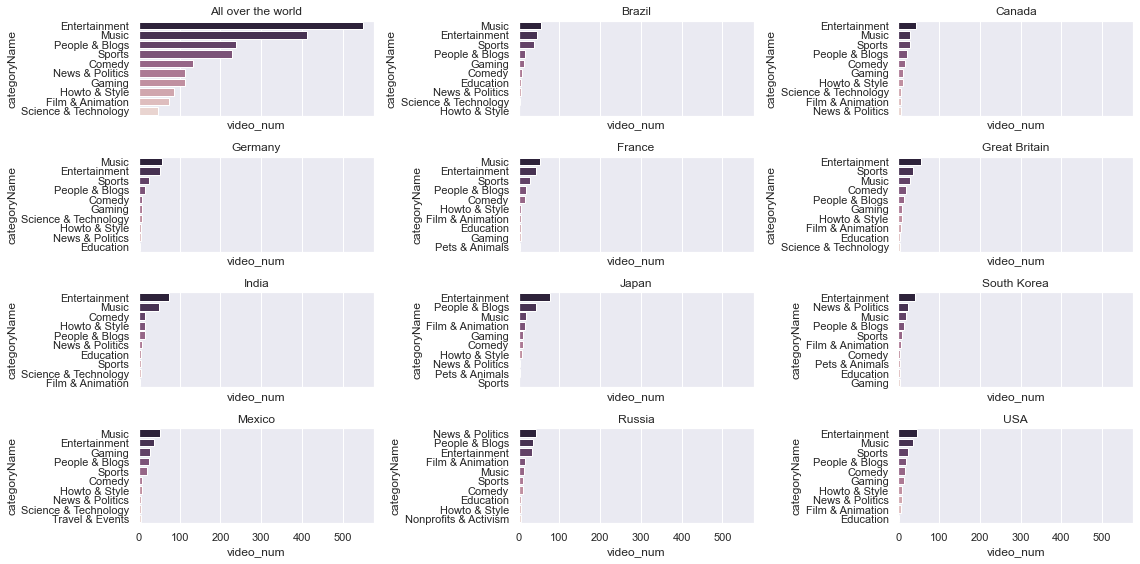

In [123]:
#I decided to do it as a big figure
sns.axes_style("whitegrid") 
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(16,8))
#fig.suptitle('Which categories have the greatest number of trendy video')

#sns.set(font_scale=0.5)

#I think it'd better to keep horizontal
sns.barplot(ax=axes[0, 0], x="video_num", y="categoryName", data=sorted_count51,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[0,0].set_title("All over the world")



sns.barplot(ax=axes[0, 1], x="video_num", y="categoryName", data=sorted_count52,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[0,1].set_title('Brazil')



sns.barplot(ax=axes[0, 2], x="video_num", y="categoryName", data=sorted_count53,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[0,2].set_title('Canada')



sns.barplot(ax=axes[1,0], x="video_num", y="categoryName", data=sorted_count54,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[1,0].set_title('Germany')



sns.barplot(ax=axes[1,1], x="video_num", y="categoryName", data=sorted_count55,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[1,1].set_title('France')



sns.barplot(ax=axes[1,2], x="video_num", y="categoryName", data=sorted_count56,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[1,2].set_title('Great Britain')



sns.barplot(ax=axes[2,0], x="video_num", y="categoryName", data=sorted_count57,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[2,0].set_title('India')



sns.barplot(ax=axes[2,1], x="video_num", y="categoryName", data=sorted_count58,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[2,1].set_title('Japan')



sns.barplot(ax=axes[2,2], x="video_num", y="categoryName", data=sorted_count59,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[2,2].set_title('South Korea')



sns.barplot(ax=axes[3,0], x="video_num", y="categoryName", data=sorted_count510,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[3,0].set_title('Mexico')



sns.barplot(ax=axes[3,1], x="video_num", y="categoryName", data=sorted_count511,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[3,1].set_title('Russia')



sns.barplot(ax=axes[3,2], x="video_num", y="categoryName", data=sorted_count512,
            palette=sns.cubehelix_palette(n_colors=10, reverse=True))

axes[3,2].set_title('USA')

#to make it look better
plt.tight_layout()

By looking at this figure, we can say that Entertainment & Music are the most popular categories among all counties, except Russia. I find the fact of News & Politics being the most trendy in Russia interesting. Furthermore, in Russia Entertainment takes 3rd place (in other countries it's least 2nd place) and Music at 5th.

Despite the fact that in previous analysis most of top content creators' videos are in Music category, the above figure shows that internationally Entertainment category is the winner. However, in several countries Music- at the top. Outcomes:

+ Entertainment is the most popular category internationally (549 videos)
+ Music is the second most popular category internationally (412 videos) 
+ Nonprofits & Activism is the least popular category (7 videos)
+ Music is at the top-1 in Brazil, Germany, France and Mexico (4 countries out of 11).
+ Entertainment is the local winner in Canada, Great Britain, India, Japan, South Korea and USA (6 countries out of 11)
+ Russia is the only one country that has at the top-1 trendings News & Politics

## 5. Conclusion

For me, results are interesting. We analyzed the dataset of August 2020, which contains information about more than 2000 videos of 11 countries. Based on the above analysis, we can draw several conclusions about YouTube Trends. 

Firstly, the symbols - and | are common in trending video titles.

Secondly, the Big Hit Labels is the channel having 27 trending videos, which makes it being the channel with the largest number of trending videos.

Thirdly, the category that has the highest number of trending videos is Entertainment with 549 videos, followed by Music with 412 videos.

Fourthly, Nonprofits & Activism is the least popular category with only 7 videos.